In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
 

In [19]:
X_raw = pd.read_csv('../data/X_train_essays.csv')
X_train = X_raw.drop(['Unnamed: 0'], axis=1, inplace=False)


y_raw = pd.read_csv('../data/Y_train_essays.csv')
y_train = y_raw.drop(['Unnamed: 0'], axis=1, inplace=False)


X_test_raw = pd.read_csv('../data/X_test_essays.csv')
X_test_df = X_test_raw.drop(['Unnamed: 0'], axis=1, inplace=False)

y_test_raw = pd.read_csv('../data/Y_test_essays.csv')
y_test_df = y_test_raw .drop(['Unnamed: 0'], axis=1, inplace=False)

X_train.head(10)


,text
0,think exploring venus really worth try due opp...
1,driveless cars better manual driving cars driv...
2,author good points make idea believe would big...
3,students expressions everyday people coming ne...
4,response think completing summer projects summ...
5,new technology read peoples emotions could rea...
6,famous article mars martian enigma unmasking f...
7,debate electoral college system voters select ...
8,schools require students complete summer proje...
9,every summer students struggle dreadful assign...


In [20]:
val = pd.read_csv('../data/validation.csv')
val.head(10)
val.drop(['Unnamed: 0', 'id', 'prompt_id'], axis=1, inplace=True)
val.head(10)

,text,generated
0,"_,_ _and it has to do with the fact that if yo...",1
1,There are advantages of limiting car usage les...,1
2,Limiting car usage ii very beneifial to not on...,1
3,Cars have been one of the most advanced invent...,1
4,Are cars even really necessary? Vehicles can c...,1
5,The use of cars may seem like a convenient sol...,1
6,In the world today i think its good to not dri...,1
7,"The breeze of the late summer air, it's fragra...",1
8,"In today's world, many fellow citizens rely he...",1
9,"Many places in the world, seem to be facing si...",0


In [21]:
X = X_train['text']
X = X.fillna('')
y = y_train['generated']

X_test = X_test_df['text']
y_test = y_test_df['generated']


X_val = val['text']
y_val = val['generated']

X.head(10)

0    think exploring venus really worth try due opp...
1    driveless cars better manual driving cars driv...
2    author good points make idea believe would big...
3    students expressions everyday people coming ne...
4    response think completing summer projects summ...
5    new technology read peoples emotions could rea...
6    famous article mars martian enigma unmasking f...
7    debate electoral college system voters select ...
8    schools require students complete summer proje...
9    every summer students struggle dreadful assign...
Name: text, dtype: object

In [22]:
vect = CountVectorizer(max_features= 270)
X_train_bow= vect.fit_transform(X)
X_val_bow = vect.transform(X_val)


In [23]:
#Naive Bayes Model
rf = RandomForestClassifier(n_estimators=50, random_state=42)
#50 estimators -> 86.6%
rf.fit(X_train_bow, y_train)

/Users/induabhilash/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50, random_state=42)

In [24]:
X_test_bow = vect.transform(X_test)
y_pred = rf.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")

Accuracy: 0.8575134222114978
Precision: 0.8530148655420077
F1-Score: 0.9153313976413235


In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2895  4400]
 [  324 25535]]


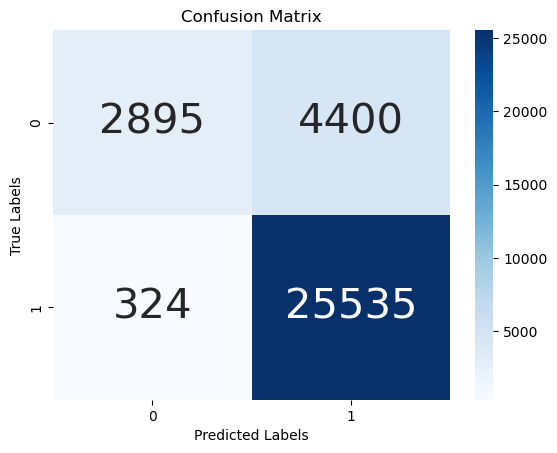

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

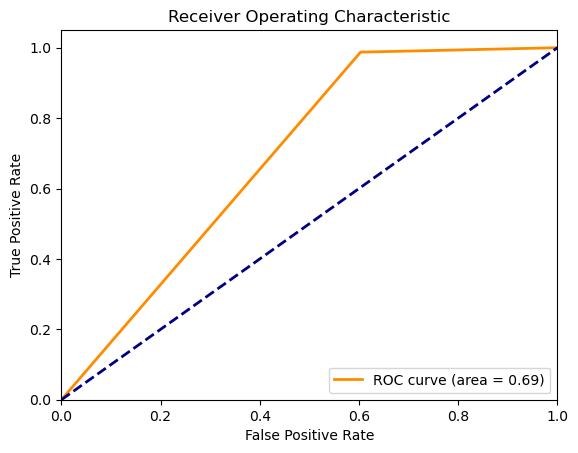

In [30]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
